## Exploratory Data Analysis of US Accidents and Weather Dataset

In this notebook I will explore basic trends, correlations, and curiosities in the data, prior to deeper statistical analysis.

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [ ]:
# Data originally sourced at https://osu.app.box.com/v/us-accidents-dec19, and initially wrangled through
# https://github.com/gibsongGH/Weather-Accident-Severity/blob/master/notebooks/_Step1_Data_Wrangling.ipynb

In [2]:
df = pd.read_csv('C:/data/Accidents.csv', parse_dates = ['Start_Time', 'End_Time'])  

# Which days of the week have the most accidents?

         weekday
weekday         
Tue      497,951
Wed      493,197
Fri      491,159
Thu      482,875
Mon      464,057
Sat      152,640
Sun      135,525


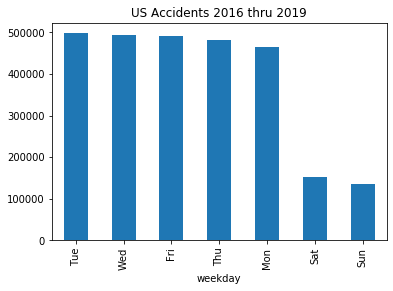

In [5]:
# Distribution of accidents Day of Week
weekday_count = pd.DataFrame(df.groupby('weekday').weekday.count().sort_values(ascending = False))
weekday_count.plot(kind='bar', legend=None, title = 'US Accidents 2016 thru 2019')
plt.show
weekday_count['weekday'] = weekday_count['weekday'].astype(int).apply(lambda x: "{:,}".format(x)) 
print(weekday_count)

Fairly even distribution on the five weekdays, each near 500,000 accidents.  Surprising that Tuesday tops the list, with Monday the last weekday and 93% of Tuesday's high.  

After a weekend rest and starting fresh on Mondays, are drivers less alert on Tuesdays with less sleep and more stress?

# Which hours have the most accidents?

         hour
hour         
8     258,046
7     246,886
17    205,815
16    195,894
15    163,200
9     161,829
18    155,280
6     151,439
10    144,910
11    142,976
14    137,469
13    129,532
12    127,568
19    107,010
20     75,398
5      74,593
21     52,934
4      47,969
22     43,902
23     24,200
0      20,876
2      16,943
3      16,621
1      16,114


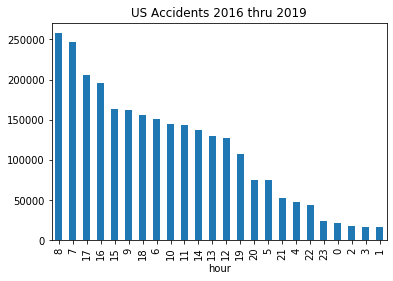

In [6]:
# Distribution of accidents by hour of day
hour_count = pd.DataFrame(df.groupby('hour').hour.count().sort_values(ascending = False))
hour_count.plot(kind='bar', legend=None, title = 'US Accidents 2016 thru 2019')
plt.show
hour_count['hour'] = hour_count['hour'].astype(int).apply(lambda x: "{:,}".format(x)) 
print(hour_count)

As expected, commuting time ranks highest in accident volume, hours starting at 8AM & 7AM, followed by 5PM & 4PM.

# Which months stand out for accidents?  Summer travel?  Winter ice?

In [8]:
# Accidents by month
df.groupby(df.Start_Time.dt.to_period("M")).ID.count().astype(int).apply(lambda x: "{:,}".format(x)) 

Start_Time
2016-02       876
2016-03     5,904
2016-04    17,192
2016-05    16,888
2016-06    28,907
2016-07    43,729
2016-08    53,883
2016-09    52,280
2016-10    52,621
2016-11    60,727
2016-12    54,029
2017-01    49,986
2017-02    47,034
2017-03    52,430
2017-04    45,159
2017-05    38,428
2017-06    43,077
2017-07    40,769
2017-08    75,962
2017-09    70,736
2017-10    70,113
2017-11    65,064
2017-12    64,558
2018-01    65,337
2018-02    64,764
2018-03    68,787
2018-04    67,756
2018-05    72,070
2018-06    60,214
2018-07    62,547
2018-08    72,435
2018-09    68,798
2018-10    82,335
2018-11    76,637
2018-12    64,830
2019-01    70,261
2019-02    65,647
2019-03    64,281
2019-04    64,257
2019-05    65,148
2019-06    57,402
2019-07    58,377
2019-08    65,813
2019-09    78,055
2019-10    94,348
2019-11    71,928
2019-12    85,025
Freq: M, Name: ID, dtype: object

The data capture does not appear to be complete on a regular basis until month 7 in 2016

Year over year volume comparisons will have to be from 2017 - 2019

In [3]:
# add year column
df['year'] = df['Start_Time'].dt.year

In [4]:
# create 2017-2019 filter
three = (df['year'] > 2016) & (df['year'] < 2020)

In [5]:
# convert Month integer to sortable abbreviation
df['Months'] = df['Start_Time'].dt.strftime('%b')

In [6]:
# groupby Month
# month_group = df.loc[three].groupby('Months')
month_group = df.loc[three].groupby(['Month','Months'], sort = True)

Month  Months
1      Jan       185,584
2      Feb       177,445
3      Mar       185,498
4      Apr       177,172
5      May       175,646
6      Jun       160,693
7      Jul       161,693
8      Aug       214,210
9      Sep       217,589
10     Oct       246,796
11     Nov       213,629
12     Dec       214,413
Name: ID, dtype: object


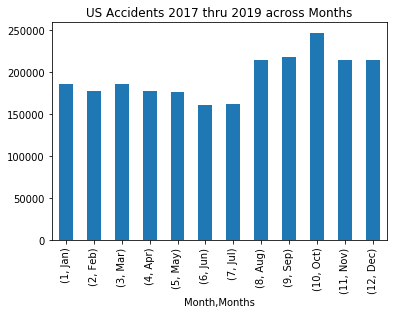

In [66]:
# Do accidents increase in colder months due to weather, or summer months due to travel?
month_count = month_group.ID.count()
month_count.plot(kind='bar', legend=None, title = 'US Accidents 2017 thru 2019 across Months')
plt.show
print(month_count.astype(int).apply(lambda x: "{:,}".format(x)))

Early to mid summer in the middle of the year have the lowest number of accidents.  Key factors may be warm and dry weather, longer periods of sunlight, lighter commuting volume, and no school activity.

The last five months of the calendar year average 23% higher than the first five months.

October stands out as the highest month for accidents.  October is 11% of total yearly accidents, as well as a 15% increase over surrounding months.  Contributing factors may be adjusting to the darker commute hours, Columbus Day weekend travel, and pedestrian accidents during Halloween.

# Are accidents increasing over time?

In [9]:
# create filter to limit months to July and later to include 2016 in yearly comparisons
july = (df['Month'] > 6) & (df['year'] < 2020)

In [10]:
# groupby year
year_group = df.loc[july].groupby(['year'])

year
2016    317,269
2017    387,202
2018    427,582
2019    453,546
Name: ID, dtype: object


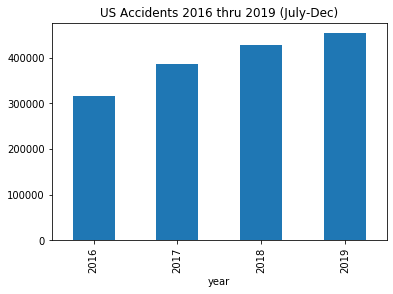

In [13]:
# Are accidents trending in this dataset?
year_count = year_group.ID.count()
year_count.plot(kind='bar', legend=None, title = 'US Accidents 2016 thru 2019 (July-Dec)')
plt.show
print(year_count.astype(int).apply(lambda x: "{:,}".format(x)))

A visible upward trend in yearly accident counts.  This dataset only partially collected the first half of 2016, all years are comparing the second half.  One theory is the increase in distracted driving due to smartphone use.

# Do correlations exist between weather and accident severity?

In [15]:
# It can rain during good weather indicator
subset = (df['Weather_Condition'].isin(['Fair', 'Clear'])) & (df['Precipitation(in)']>0.1) 
WCFair = df[['Weather_Condition', 'Precipitation(in)']][subset]
print(WCFair.head(10))

     Weather_Condition  Precipitation(in)
602              Clear           0.135625
603              Clear           0.131250
604              Clear           0.126875
605              Clear           0.122500
607              Clear           0.113750
608              Clear           0.109375
609              Clear           0.105000
1977             Clear           0.650000
1978             Clear           0.640000
1988             Clear           0.490000


In [4]:
# Does Duration of the accident correlate to the Severity column?  No
df['Duration(m)'].corr(df['Severity'])

0.030282695053906208

In [3]:
# Does Distance of the traffic correlate to the Severity column?  A small correlation
df['Distance(mi)'].corr(df['Severity'])

0.18229177761804244

In [17]:
# Correlation of remaining figures
cols = ['Severity', 'Duration(m)', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']
df[cols].corr()

,Severity,Duration(m),Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
Severity,1.000000,0.030283,0.182292,-0.023773,-0.025837,0.022769,0.036195,-0.013427,0.026456,0.026630
Duration(m),0.030283,1.000000,0.260236,0.004249,-0.016546,-0.028624,0.018104,0.015584,0.037582,0.030766
Distance(mi),0.182292,0.260236,1.000000,-0.053828,-0.051282,0.018782,0.006876,-0.011319,0.029723,0.022079
Temperature(F),-0.023773,0.004249,-0.053828,1.000000,0.833849,-0.326159,-0.207036,0.212008,0.004091,0.057375
Wind_Chill(F),-0.025837,-0.016546,-0.051282,0.833849,1.000000,-0.139447,-0.272570,0.154579,-0.110910,0.039259
Humidity(%),0.022769,-0.028624,0.018782,-0.326159,-0.139447,1.000000,0.033721,-0.411083,-0.156193,0.105023
Pressure(in),0.036195,0.018104,0.006876,-0.207036,-0.272570,0.033721,1.000000,0.036326,-0.010029,0.055780
Visibility(mi),-0.013427,0.015584,-0.011319,0.212008,0.154579,-0.411083,0.036326,1.000000,0.028438,-0.124066
Wind_Speed(mph),0.026456,0.037582,0.029723,0.004091,-0.110910,-0.156193,-0.010029,0.028438,1.000000,0.035012
Precipitation(in),0.026630,0.030766,0.022079,0.057375,0.039259,0.105023,0.055780,-0.124066,0.035012,1.000000


There is only one observed strong correlation between Temperature and Wind Chill.  

A moderate, negative correlation between Visibility and Humidity, as increased humidity can create foggy driving condititions.  Interestingly, Temperature and Humidity are also negatively correlated.  According to online sources, as air temperature increases, air can hold more water vapor, and its relative humidity decreases.

Duration and Distance of traffic have a low correlation together of 0.26.  Surprisingly, Temperature alone, which could indicate freezing conditions, does not correlate to Duration or Distance of traffic accidents.  There are no weather metrics with clear correlation to accident severity, duration, or distance.

In [18]:
# output correlation
weather_corr = df[cols].corr()
weather_corr.to_csv("C:\data\weather_corr.csv")